<ipython-input-10-ad52d15008eb>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if type(x) == str else x)
<ipython-input-10-ad52d15008eb>:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_urls(x) if isinstance(x, str) else x)
<ipython-input-10-ad52d15008eb>:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_special_characters(x) if isinstance(x, str) else x)


       UserName  ScreenName                     Location   TweetAt  \
0          3799       48751                       london  16032020   
1          3800       48752                           uk  16032020   
2          3801       48753                    vagabonds  16032020   
3          3802       48754                          NaN  16032020   
4          3803       48755                          NaN  16032020   
...         ...         ...                          ...       ...   
41152     44951       89903  wellington city new zealand  14042020   
41153     44952       89904                          NaN  14042020   
41154     44953       89905                          NaN  14042020   
41155     44954       89906                          NaN  14042020   
41156     44955       89907    i love you so much  hehim  14042020   

                                           OriginalTweet           Sentiment  
0                                               and and              neutral  
1

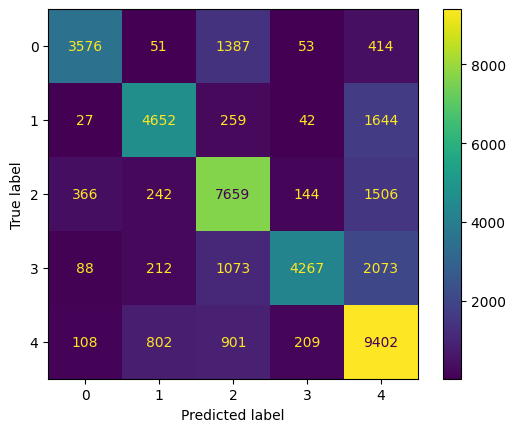

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

def remove_special_characters(text):
        # Remove special characters using regex
        text = re.sub(r"[^a-zA-Z0-9 ]+", "", str(text))
        return text
def remove_urls(text):
       text = re.sub(r'http\S+', '', text)
       text = re.sub(r'#\S+', '', text)
       text = re.sub(r'@\S+', '', text)
       text = re.sub(r'\s+', ' ', text)
       return text

df = pd.read_csv('https://raw.githubusercontent.com/dbnewman609/undergrad-projects/main/David%20Newman/covid%20tweets.csv', encoding='latin1')
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df = df.applymap(lambda x: remove_urls(x) if isinstance(x, str) else x)
df = df.applymap(lambda x: remove_special_characters(x) if isinstance(x, str) else x)


print(df)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['OriginalTweet'])

classifier = MultinomialNB()
classifier.fit(X, df['Sentiment'])
test_examples = ("everyone please stay inside","there is no need to panic")
test_examples_vectorized = vectorizer.transform(test_examples)
predictions = classifier.predict(test_examples_vectorized)
print(predictions)

accuracy = accuracy_score(df['Sentiment'], classifier.predict(X))
precision = precision_score(df['Sentiment'], classifier.predict(X), average='weighted')
recall = recall_score(df['Sentiment'], classifier.predict(X), average='weighted')
f1 = f1_score(df['Sentiment'], classifier.predict(X), average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(df['Sentiment'], classifier.predict(X))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
